### 【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\left[\begin{array}{c}
1.0 \quad 0.8 \\
0.8 \quad 1.0 \\
\end{array}\right]
$$

多次元の正規分布による乱数は`np.random.multivariate_normal()`を使うことで作成できます。

In [2]:
import numpy as np

mean = np.array([-3, 0])
cov = np.array([[1.0, 0.8], [0.8, 1.0]])

np.random.seed(0)
data = np.random.multivariate_normal(mean, cov, size=500)

In [3]:
print(data.shape)
print(data)

(500, 2)
[[-4.80006782e+00 -1.54698618e+00]
 [-4.63714503e+00 -2.19879728e-01]
 [-4.46267867e+00 -2.08076347e+00]
 [-3.85346966e+00 -9.49196365e-01]
 [-3.03192065e+00  2.27764648e-01]
 [-3.59653339e+00  3.23229932e-01]
 [-3.76046080e+00 -6.83506760e-01]
 [-3.52660272e+00 -3.15568548e-01]
 [-4.35253112e+00 -1.48228460e+00]
 [-3.02691331e+00 -5.67090887e-01]
 [-7.84713550e-01  2.62867115e+00]
 [-3.58538300e+00 -1.05476937e+00]
 [-4.69336749e+00 -2.61318911e+00]
 [-2.98421761e+00 -1.02603072e-01]
 [-4.91877408e+00 -9.89469999e-01]
 [-3.26658152e+00 -2.74105461e-02]
 [-1.53138965e+00  2.15844669e-01]
 [-2.71938344e+00  3.79500330e-01]
 [-4.54738211e+00 -7.86930327e-01]
 [-2.53695299e+00  2.71853959e-01]
 [-1.55620621e+00  5.45695585e-01]
 [-1.99817931e+00  2.23559938e+00]
 [-2.37797023e+00  3.44967255e-01]
 [-2.05735800e+00  1.43437007e+00]
 [-1.40164768e+00  1.46380355e+00]
 [-2.27283514e+00  9.71863483e-01]
 [-2.14205902e+00  1.11243624e-01]
 [-3.10871442e+00  1.62186440e-01]
 [-3.158753

### 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。

散布図は`matplotlibのplt.scatter()`を使うことで描けます。

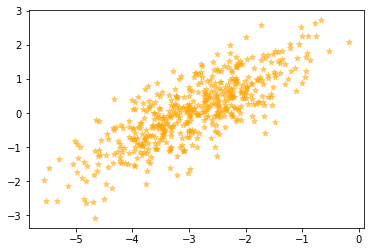

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data[:, 0], data[:, 1], marker="*", alpha=0.5, c="orange")

### 【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。

ヒストグラムは`plt.hist()`を使うことで描けます。

<Figure size 432x288 with 0 Axes>

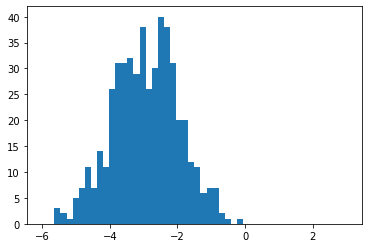

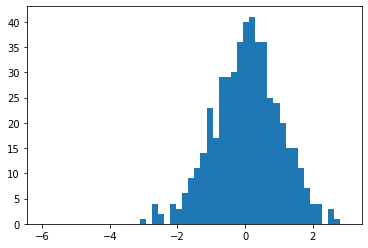

<Figure size 432x288 with 0 Axes>

In [5]:
plt.hist(data[:, 0], bins=50, range=(-6, 3))
plt.figure()
plt.hist(data[:, 1], bins=50, range=(-6, 3))
plt.figure()

### 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\left[\begin{array}{c}
1.0 \quad 0.8 \\
0.8 \quad 1.0 \\
\end{array}\right]
$$

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。

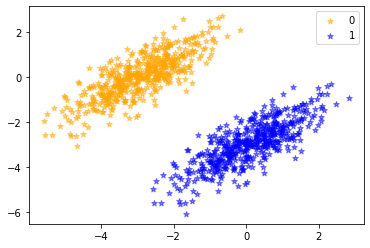

In [6]:
mean = np.array([0, -3])
cov = np.array([[1.0, 0.8], [0.8, 1.0]])

np.random.seed(0)
data2 = np.random.multivariate_normal(mean, cov, size=500)

plt.scatter(data[:, 0], data[:, 1], marker="*", alpha=0.5, c="orange", label="0")
plt.scatter(data2[:, 0], data2[:, 1], marker="*", alpha=0.5, c="blue", label="1")
plt.legend()

### 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合は`np.concatenate()`や`np.vstack()`を使うことで行えます。

In [7]:
data_1and2 = np.concatenate([data, data2])
print(data_1and2.shape)

(1000, 2)


### 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

In [8]:
label1 = np.full(500, 0)
label2 = np.full(500, 1)

tmp1 = np.zeros((500, 3))
tmp2 = np.zeros((500, 3))

for cnt, (d, l) in enumerate(zip(data, label1)):
    tmp1[cnt] = np.append(d, l)

for cnt, (d, l) in enumerate(zip(data2, label2)):
    tmp2[cnt] = np.append(d, l)

data_final = np.concatenate([tmp1, tmp2])

print(data_final)
print(data_final.shape)

[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.40484501 -3.14372258  1.        ]
 [ 0.1584315  -2.78199606  1.        ]
 [ 1.20196495 -2.02452628  1.        ]]
(1000, 3)


In [9]:
# 結合部を確認
print(data_final[499])
print(data_final[500])

[-1.79803505  0.97547372  0.        ]
[-1.80006782 -4.54698618  1.        ]
